Training model with max pooling...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3608 - loss: 1.7447 - val_accuracy: 0.5381 - val_loss: 1.2970
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5599 - loss: 1.2438 - val_accuracy: 0.6007 - val_loss: 1.1366
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6209 - loss: 1.0843 - val_accuracy: 0.6373 - val_loss: 1.0384
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6602 - loss: 0.9746 - val_accuracy: 0.6533 - val_loss: 1.0046
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6883 - loss: 0.8958 - val_accuracy: 0.6495 - val_loss: 1.0252
Accuracy values for max pooling:
Epoch 1: Validation Accuracy = 0.5381
Epoch 2: Validation Accuracy = 0.6007
Epoch 3: Validation Accuracy = 0.6373
Epoch 4: Validation Accuracy = 0.6533
Epoch 5: Validation Accuracy = 0.6495
Final Validation Accuracy for max pooling: 0.6495
Training model with avg pooling...
Epoch 1/5
78

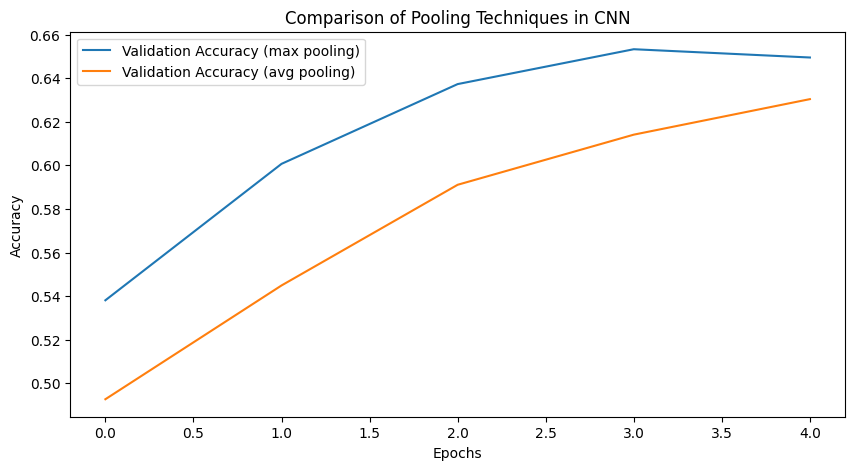

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


def create_model(pooling_type='max'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    if pooling_type == 'max':
        model.add(layers.MaxPooling2D((2, 2)))
    elif pooling_type == 'avg':
        model.add(layers.AveragePooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    if pooling_type == 'max':
        model.add(layers.MaxPooling2D((2, 2)))
    elif pooling_type == 'avg':
        model.add(layers.AveragePooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

pooling_methods = ['max', 'avg']
results = {}

for pooling in pooling_methods:
    print(f"Training model with {pooling} pooling...")
    model = create_model(pooling_type=pooling)
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)
    results[pooling] = history.history

   
    print(f"Accuracy values for {pooling} pooling:")
    for epoch in range(5):
        print(f"Epoch {epoch+1}: Validation Accuracy = {history.history['val_accuracy'][epoch]:.4f}")
    
    # Print final validation accuracy
    final_accuracy = history.history['val_accuracy'][-1]
    print(f"Final Validation Accuracy for {pooling} pooling: {final_accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 5))
for pooling in pooling_methods:
    plt.plot(results[pooling]['val_accuracy'], label=f'Validation Accuracy ({pooling} pooling)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Pooling Techniques in CNN')
plt.show()
